AGRICULTURAL ANALYSIS

INTRODUCTION

Agriculture plays an important role in the global economy, serving as the backbone of many countries, including India, where it contributes significantly to GDP and employment. Agricultural commodities such as fruits, vegetables, pulses, and cereals are not only vital for food security but also form the livelihood foundation for millions of farmers, traders, and businesses involved in the agribusiness ecosystem. The sector's impact extends beyond the fields, influencing supply chains, retail markets, and the daily lives of consumers.

Farmers, who are the primary producers, face numerous challenges, including price volatility, market access, and unpredictable weather conditions. These challenges affect their income stability and decision-making capabilities. Agribusinesses, which bridge the gap between producers and consumers, must constantly adapt to market trends and price dynamics to ensure profitability and supply chain efficiency. Policymakers, on the other hand, are responsible for creating an environment that supports fair pricing, market stability, and sustainable agricultural practices.

This project focuses on analyzing agricultural market data to provide actionable insights for these key stakeholders—farmers, agribusinesses, and policymakers. By examining price trends, volatility, and regional disparities in market prices, this analysis aims to uncover patterns that can inform strategic decisions. For farmers, understanding price trends can help optimize planting schedules and market timing. Agribusinesses can leverage insights on price volatility and market behavior to enhance procurement strategies and minimize risks. Policymakers can identify areas needing interventions, such as price stabilization measures or infrastructure investments, to ensure a balanced and efficient market.And Farmers and Agri businesses can look into growth opportunities.

Through data categorization, price analysis, and volatility assessments, this project seeks to empower stakeholders with the knowledge needed to navigate the complex agricultural landscape, ultimately contributing to a more resilient and prosperous agricultural sector.


In [100]:
#imported necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


DATA LOADING AND PREPARATION 

The dataset containing agricultural market data is loaded. The dataset includes columns like state, district, market, commodity, variety, arrival date, min price, max price, and modal price. After loading, the data is cleaned to ensure consistency, and missing values are handled appropriately. The data preparation also involves categorizing the commodities into eight groups for a more structured analysis.

-> Cleaning data helps reduce noise, which improves the quality of engineered features.

-> Missing value handling ensures that analyses are not biased or skewed due to incomplete data.


In [101]:
#loaded dataset

df = pd.read_csv('C:\\Users\\lenovo\\Downloads\\_dataset.txt', delimiter='\t')
df

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04-03-2019,6000,8000,7000
1,Kerala,Ernakulam,Piravam,Amaranthus,Other,04-03-2019,1500,2000,1800
2,Kerala,Kasargod,Kasargod,Amaranthus,Other,04-03-2019,1500,1600,1550
3,Kerala,Kasargod,Manjeswaram,Amaranthus,Amaranthus,04-03-2019,2400,3400,2900
4,Kerala,Kollam,Anchal,Amaranthus,Other,04-03-2019,4500,4700,4600
...,...,...,...,...,...,...,...,...,...
2233,Uttar Pradesh,Muzaffarnagar,Thanabhawan,Wood,Other,04-03-2019,250,300,295
2234,Uttar Pradesh,Saharanpur,Gangoh,Wood,Beete (Rose),04-03-2019,415,450,440
2235,Uttar Pradesh,Saharanpur,Nakud,Wood,Other,04-03-2019,250,300,280
2236,Uttar Pradesh,Saharanpur,Nanuta,Wood,Other,04-03-2019,350,500,450


In [102]:
df.shape

(2238, 9)

In [103]:
df.dtypes

state           object
district        object
market          object
commodity       object
variety         object
arrival_date    object
min_price        int64
max_price        int64
modal_price      int64
dtype: object

In [104]:
df.isnull().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

In [105]:
#checked unique commodities
print(df['commodity'].unique())
print(df['state'].unique())  

['Amaranthus' 'Amla(Nelli Kai)' 'Amphophalus' 'Apple'
 'Arecanut(Betelnut/Supari)' 'Arhar (Tur/Red Gram)(Whole)'
 'Arhar Dal(Tur Dal)' 'Ashgourd' 'Bajra(Pearl Millet/Cumbu)' 'Banana'
 'Banana - Green' 'Barley (Jau)' 'Beans' 'Beetroot'
 'Bengal Gram Dal (Chana Dal)' 'Bengal Gram(Gram)(Whole)'
 'Ber(Zizyphus/Borehannu)' 'Betal Leaves' 'Bhindi(Ladies Finger)'
 'Bitter gourd' 'Black Gram (Urd Beans)(Whole)' 'Black Gram Dal (Urd Dal)'
 'Black pepper' 'Bottle gourd' 'Brinjal' 'Broken Rice' 'Cabbage'
 'Capsicum' 'Carrot' 'Cashewnuts' 'Castor Seed' 'Cauliflower'
 'Chikoos(Sapota)' 'Chilly Capsicum' 'Cluster beans' 'Coconut'
 'Coconut Oil' 'Coconut Seed' 'Colacasia' 'Copra' 'Coriander(Leaves)'
 'Corriander seed' 'Cotton' 'Cowpea (Lobia/Karamani)' 'Cowpea(Veg)'
 'Cucumbar(Kheera)' 'Drumstick' 'Dry Chillies' 'Duster Beans'
 'Elephant Yam (Suran)' 'Field Pea' 'Fish' 'French Beans (Frasbean)'
 'Garlic' 'Ghee' 'Gingelly Oil' 'Ginger(Dry)' 'Ginger(Green)'
 'Gram Raw(Chholia)' 'Grapes' 'Green Avare (W

In [106]:
# Count of unique commodities and their no of  occurrences
commodity_Occur = df['commodity'].value_counts()
commodity_Occur 

Potato                 113
Tomato                 103
Paddy(Dhan)(Common)     99
Brinjal                 99
Onion                   99
                      ... 
Castor Seed              1
Broken Rice              1
Rubber                   1
Seemebadnekai            1
Round gourd              1
Name: commodity, Length: 156, dtype: int64

In [107]:
#variety Analysis
variety_avg_prices = df.groupby(['commodity', 'variety'])[['min_price', 'max_price', 'modal_price']].mean()
print(variety_avg_prices.head(30))

                                                   min_price     max_price  \
commodity                   variety                                          
Amaranthus                  Amaranthus           3300.000000   4225.000000   
                            Other                2160.000000   2400.000000   
Amla(Nelli Kai)             Other                3700.000000   3900.000000   
Amphophalus                 Amphophalus          1800.000000   2000.000000   
                            Other                2360.000000   2740.000000   
Apple                       American             3500.000000   3500.000000   
                            Apple                4455.555556   5238.888889   
                            Delicious            5600.000000   5768.750000   
                            Kasmir/Shimla - II   5696.250000   5796.250000   
                            Other                4777.777778   7466.666667   
                            Simla                5400.000000   8

DATA CATEGORIZATION

Commodities are categorized into eight groups: Fruits, Vegetables, Pulses, Nuts and Seeds, Oilseeds, Cereals, Spices, and Others. This grouping facilitates targeted analysis, allowing  to compare similar commodities and understand price dynamics within each category.

-> Categorizing commodities makes it easier to spot trends and anomalies in specific groups.

-> Group-based analysis allows for more actionable insights, such as identifying which commodity groups are more volatile or stable.


In [108]:
#grouping commodities 
commodity_mapping = {
    'Amaranthus': 'Vegetables',
    'Amla(Nelli Kai)': 'Fruits',
    'Amphophalus': 'Vegetables',
    'Apple': 'Fruits',
    'Arecanut(Betelnut/Supari)': 'Nuts and Seeds',
    'Arhar (Tur/Red Gram)(Whole)': 'Pulses and Legumes',
    'Arhar Dal(Tur Dal)': 'Pulses and Legumes',
    'Ashgourd': 'Vegetables',
    'Bajra(Pearl Millet/Cumbu)': 'Grains and Cereals',
    'Banana': 'Fruits',
    'Banana - Green': 'Fruits',
    'Barley (Jau)': 'Grains and Cereals',
    'Beans': 'Vegetables',
    'Beetroot': 'Vegetables',
    'Bengal Gram Dal (Chana Dal)': 'Pulses and Legumes',
    'Bengal Gram(Gram)(Whole)': 'Pulses and Legumes',
    'Ber(Zizyphus/Borehannu)': 'Fruits',
    'Betal Leaves': 'Others',
    'Bhindi(Ladies Finger)': 'Vegetables',
    'Bitter gourd': 'Vegetables',
    'Black Gram (Urd Beans)(Whole)': 'Pulses and Legumes',
    'Black Gram Dal (Urd Dal)': 'Pulses and Legumes',
    'Black pepper': 'Spices and Condiments',
    'Bottle gourd': 'Vegetables',
    'Brinjal': 'Vegetables',
    'Broken Rice': 'Grains and Cereals',
    'Cabbage': 'Vegetables',
    'Capsicum': 'Vegetables',
    'Carrot': 'Vegetables',
    'Cashewnuts': 'Nuts and Seeds',
    'Castor Seed': 'Oilseeds and Oils',
    'Cauliflower': 'Vegetables',
    'Chikoos(Sapota)': 'Fruits',
    'Chilly Capsicum': 'Vegetables',
    'Cluster beans': 'Vegetables',
    'Coconut': 'Nuts and Seeds',
    'Coconut Oil': 'Oilseeds and Oils',
    'Coconut Seed': 'Nuts and Seeds',
    'Colacasia': 'Vegetables',
    'Copra': 'Nuts and Seeds',
    'Coriander(Leaves)': 'Spices and Condiments',
    'Corriander seed': 'Spices and Condiments',
    'Cotton': 'Others',
    'Cowpea (Lobia/Karamani)': 'Pulses and Legumes',
    'Cowpea(Veg)': 'Vegetables',
    'Cucumbar(Kheera)': 'Vegetables',
    'Drumstick': 'Vegetables',
    'Dry Chillies': 'Spices and Condiments',
    'Duster Beans': 'Vegetables',
    'Elephant Yam (Suran)': 'Vegetables',
    'Field Pea': 'Pulses and Legumes',
    'Fish': 'Animal Products',
    'French Beans (Frasbean)': 'Vegetables',
    'Garlic': 'Spices and Condiments',
    'Ghee': 'Animal Products',
    'Gingelly Oil': 'Oilseeds and Oils',
    'Ginger(Dry)': 'Spices and Condiments',
    'Ginger(Green)': 'Spices and Condiments',
    'Gram Raw(Chholia)': 'Pulses and Legumes',
    'Grapes': 'Fruits',
    'Green Avare (W)': 'Pulses and Legumes',
    'Green Chilli': 'Spices and Condiments',
    'Green Gram (Moong)(Whole)': 'Pulses and Legumes',
    'Green Gram Dal (Moong Dal)': 'Pulses and Legumes',
    'Green Peas': 'Vegetables',
    'Ground Nut Seed': 'Nuts and Seeds',
    'Groundnut': 'Nuts and Seeds',
    'Guar': 'Pulses and Legumes',
    'Guar Seed(Cluster Beans Seed)': 'Pulses and Legumes',
    'Guava': 'Fruits',
    'Gur(Jaggery)': 'Others',
    'Hybrid Cumbu': 'Grains and Cereals',
    'Indian Beans (Seam)': 'Vegetables',
    'Jowar(Sorghum)': 'Grains and Cereals',
    'Jute': 'Others',
    'Karamani': 'Pulses and Legumes',
    'Karbuja(Musk Melon)': 'Fruits',
    'Kinnow': 'Fruits',
    'Knool Khol': 'Vegetables',
    'Kodo Millet(Varagu)': 'Grains and Cereals',
    'Kulthi(Horse Gram)': 'Pulses and Legumes',
    'Leafy Vegetable': 'Vegetables',
    'Lemon': 'Fruits',
    'Lentil (Masur)(Whole)': 'Pulses and Legumes',
    'Lime': 'Fruits',
    'Linseed': 'Nuts and Seeds',
    'Little gourd (Kundru)': 'Vegetables',
    'Long Melon(Kakri)': 'Vegetables',
    'Maida Atta': 'Others',
    'Maize': 'Grains and Cereals',
    'Mango': 'Fruits',
    'Mango (Raw-Ripe)': 'Fruits',
    'Mashrooms': 'Vegetables',
    'Masur Dal': 'Pulses and Legumes',
    'Methi(Leaves)': 'Vegetables',
    'Mint(Pudina)': 'Spices and Condiments',
    'Moath Dal': 'Pulses and Legumes',
    'Mousambi(Sweet Lime)': 'Fruits',
    'Mustard': 'Spices and Condiments',
    'Mustard Oil': 'Oilseeds and Oils',
    'Niger Seed (Ramtil)': 'Nuts and Seeds',
    'Nutmeg': 'Spices and Condiments',
    'Okra(Ladies Finger)': 'Vegetables',
    'Onion': 'Vegetables',
    'Orange': 'Fruits',
    'Papaya': 'Fruits',
    'Papaya (Raw)': 'Fruits',
    'Peach': 'Fruits',
    'Peas cod': 'Vegetables',
    'Pear(Most Anj):': 'Fruits',
    'Pepper (chillies)': 'Spices and Condiments',
    'Pineapple': 'Fruits',
    'Plums': 'Fruits',
    'Pomegranate': 'Fruits',
    'Potato': 'Vegetables',
    'Pumpkin': 'Vegetables',
    'Raddish': 'Vegetables',
    'Red Chillies': 'Spices and Condiments',
    'Ridgeguard': 'Vegetables',
    'Ridgeguard (Raspuri)': 'Vegetables',
    'Seetaphal': 'Fruits',
    'Sesamum': 'Oilseeds and Oils',
    'Soyabean': 'Pulses and Legumes',
    'Spinach': 'Vegetables',
    'Sugarcane': 'Others',
    'Sunflower Seed': 'Nuts and Seeds',
    'Sweet Potato': 'Vegetables',
    'Tamarind Fruit': 'Fruits',
    'Tapioca': 'Vegetables',
    'Tomato': 'Vegetables',
    'Turmeric': 'Spices and Condiments',
    'Turnip': 'Vegetables',
    'Wheat': 'Grains and Cereals',
    'Wood Apple': 'Fruits',
    'Yam': 'Vegetables',
}


In [109]:
# Mapped commodities to groups and calculated average prices for each group

df['Group'] = df['commodity'].map(commodity_mapping)

average_prices = df.groupby('Group').agg({
    'min_price': 'mean',
    'max_price': 'mean',
    'modal_price': 'mean'
}).reset_index()

average_prices.columns = ['Group', 'Average Min Price', 'Average Max Price', 'Average Modal Price']

print(average_prices)

                   Group  Average Min Price  Average Max Price  \
0        Animal Products       16125.000000       16675.000000   
1                 Fruits        2862.989362        3403.804965   
2     Grains and Cereals        1747.696970        1858.565657   
3         Nuts and Seeds        5780.975309        6442.950617   
4      Oilseeds and Oils        9677.636364       10214.636364   
5                 Others        3916.875000        4279.156250   
6     Pulses and Legumes        4227.276190        5123.809524   
7  Spices and Condiments        4257.685185        4828.962963   
8             Vegetables        1452.979724        1756.074654   

   Average Modal Price  
0         16650.000000  
1          3188.882979  
2          1838.606061  
3          6154.259259  
4         10064.454545  
5          4159.078125  
6          5005.895238  
7          4564.018519  
8          1623.706912  


Top 10 Commodities by Modal Price : 

To identify the commodities commanding the highest average prices,  mean modal price was calculated for top 10 commodities.The plot provided a clear comparison of the average prices, helping stakeholders identify high-value commodities. Farmers can use this information to focus on growing more profitable crops, while agribusinesses can target these commodities for procurement and trading. This insight is crucial for maximizing revenue potential and strategic planning in the agricultural supply chain.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14764\1533265418.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_df, y='commodity', x='modal_price', ci=None, orient='h')


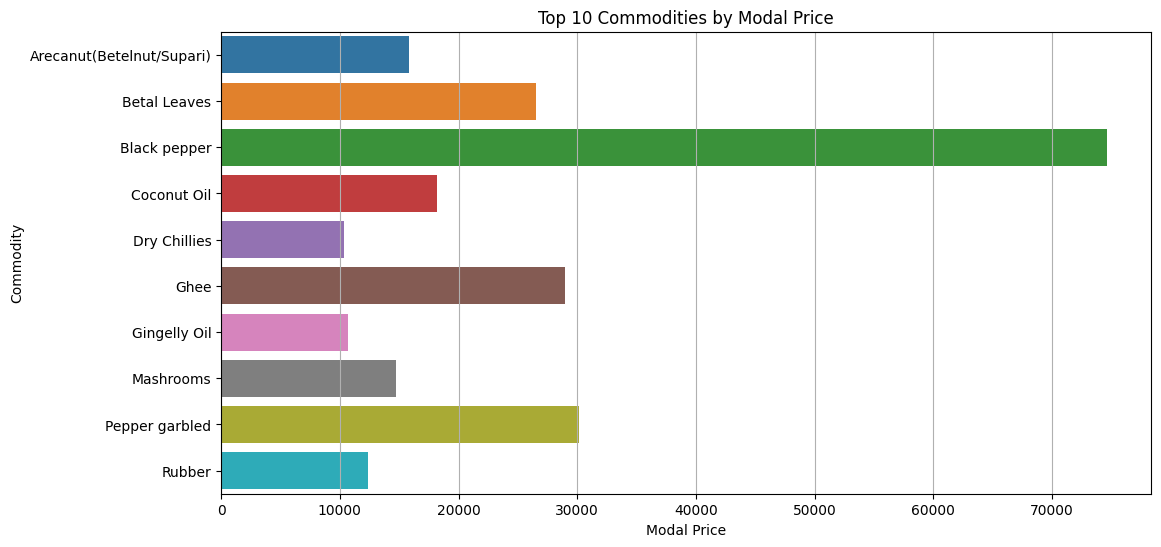

In [110]:
# top 10 commodities by modal price

top_n = 10  
top_commodities = df.groupby('commodity')['modal_price'].mean().nlargest(top_n).index

filtered_df = df[df['commodity'].isin(top_commodities)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, y='commodity', x='modal_price', ci=None, orient='h')
plt.title(f'Top {top_n} Commodities by Modal Price')
plt.xlabel('Modal Price')
plt.ylabel('Commodity')
plt.grid(axis='x') 
plt.show()

Scatter Plot of Max Price vs Min Price:

This scatter plot compares the minimum and maximum prices of commodities across different states, with each state represented by a distinct color. The plot helps visualize the spread and relationship between these prices, allowing for the identification of pricing trends and outliers. For agribusinesses, such insights can highlight states with favorable pricing conditions or irregularities, aiding in procurement and market strategy. For farmers, this understanding of price ranges can help set realistic expectations and optimize selling strategies.


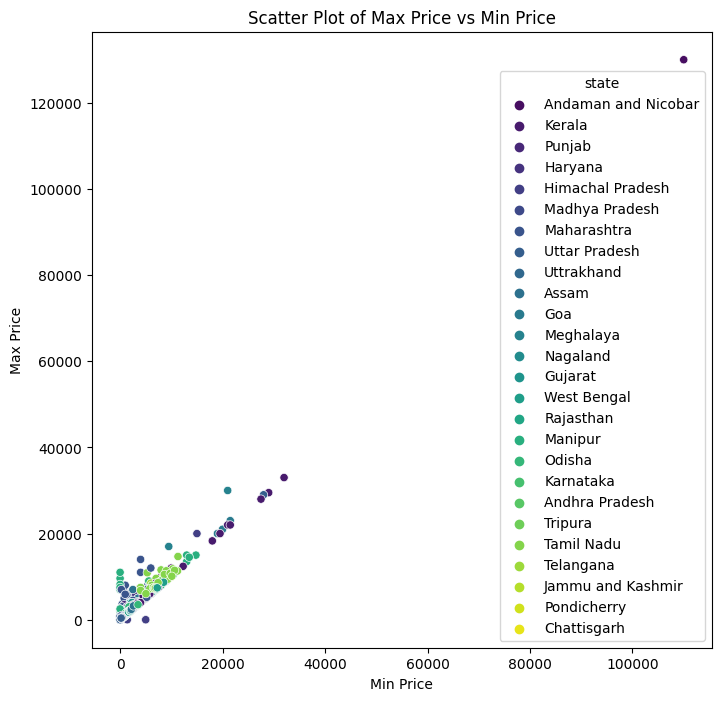

In [111]:
# Scatter plot for max_price vs min_price
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='min_price', y='max_price', hue='state', palette='viridis')
plt.title('Scatter Plot of Max Price vs Min Price')
plt.xlabel('Min Price')
plt.ylabel('Max Price')
plt.show()

PRICE ANALYSIS 

Calculated the average prices for each commodity group based on min, max, and modal prices. This provides an aggregate view of price levels, helping to identify which groups have relatively higher or lower average prices.

-> Higher average prices in certain groups might indicate scarcity or high demand.
-> Consistently low average prices could point to oversupply or low demand.
-> These features are useful for predicting market trends and planning agricultural production.


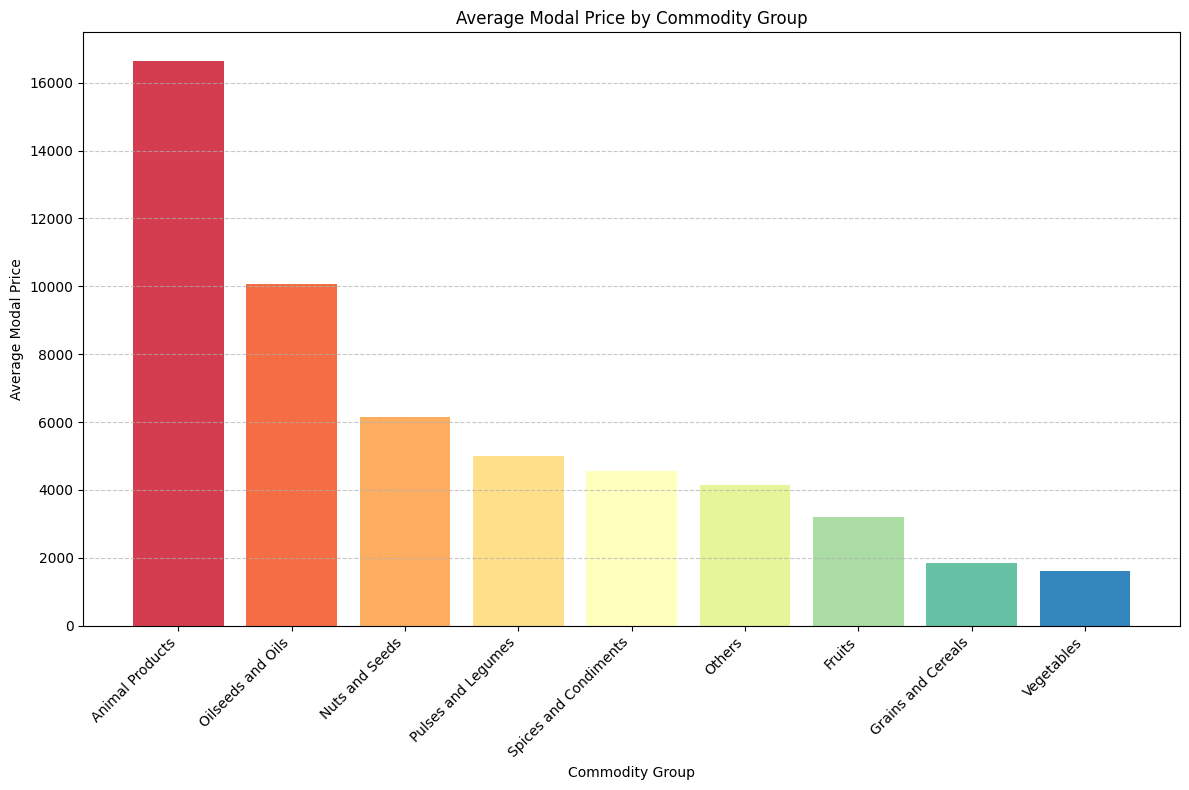

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by average modal price in descending order
average_prices_sorted = average_prices.sort_values(by='Average Modal Price', ascending=False)

# Create the color palette using Seaborn
colors = sns.color_palette('Spectral', len(average_prices_sorted))

# Plot bar chart with the Spectral palette
plt.figure(figsize=(12, 8))
plt.bar(average_prices_sorted['Group'], average_prices_sorted['Average Modal Price'], color=colors)
plt.xlabel('Commodity Group')
plt.ylabel('Average Modal Price')
plt.title('Average Modal Price by Commodity Group')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()


In [113]:
group_avg_prices = df.groupby('Group')['modal_price'].mean().reset_index()
highest_priced_group = group_avg_prices.loc[group_avg_prices['modal_price'].idxmax()]
highest_priced_group 

Group          Animal Products
modal_price            16650.0
Name: 0, dtype: object

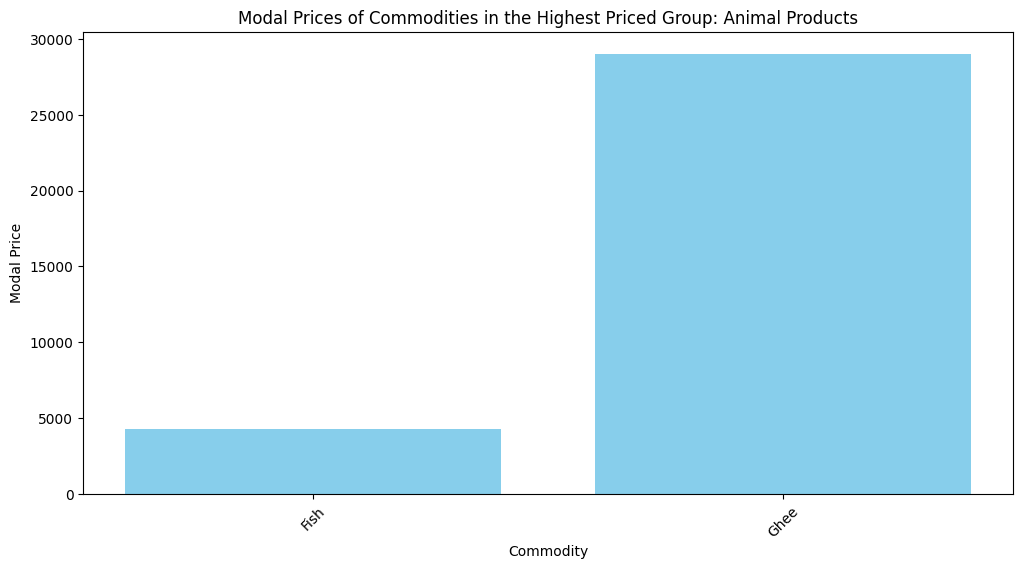

In [114]:
# Extracted the name of the highest priced group
highest_group_name = highest_priced_group['Group']

highest_group_data = df[df['Group'] == highest_group_name]

plt.figure(figsize=(12, 6))
plt.bar(highest_group_data['commodity'], highest_group_data['modal_price'], color='skyblue')
plt.xlabel('Commodity')
plt.ylabel('Modal Price')
plt.title(f'Modal Prices of Commodities in the Highest Priced Group: {highest_group_name}')
plt.xticks(rotation=45)
plt.show()

In [115]:
# State with highest modal price for Ghee
animal_products_df = df[df['Group'] == 'Animal Products']

ghee_df = animal_products_df[animal_products_df['commodity'] == 'Ghee']
highest_modal_price_ghee = ghee_df.loc[ghee_df['modal_price'].idxmax()]

print("State with highest modal price for Ghee:")
print(highest_modal_price_ghee[['state', 'market', 'modal_price']])



State with highest modal price for Ghee:
state          Uttar Pradesh
market                  Rura
modal_price            29000
Name: 955, dtype: object


ANALYZING PRICE VOLATILITY

Price volatility is calculated as the difference between the max and min prices within each group. Volatility indicates how much prices fluctuate, which can impact profitability and risk management.

-> High volatility in groups suggests that prices are less predictable, increasing market risk.

-> Low volatility may indicate stable market conditions, making them safer for investment.

-> Understanding volatility may help in designing hedging strategies and stabilizing income for farmers.


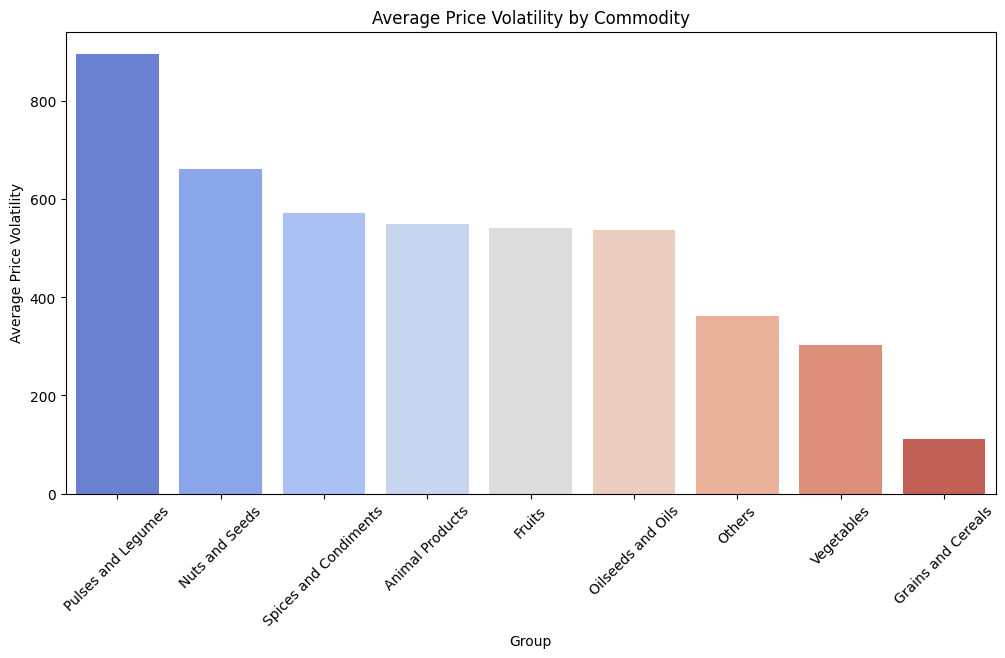

In [116]:

df['price_volatility'] = df['max_price'] - df['min_price']
volatility_by_group = df.groupby('Group')['price_volatility'].mean().reset_index()

volatility_by_group = volatility_by_group.sort_values(by='price_volatility', ascending=False)

volatility_by_group

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='price_volatility', data=volatility_by_group, palette='coolwarm')
plt.title('Average Price Volatility by Commodity')
plt.xlabel('Group')
plt.ylabel('Average Price Volatility')
plt.xticks(rotation=45)
plt.show()



> There is High volatility in Pulses and Legumes suggests that prices are less predictable, increasing market risk.
> There is Low volatility in Grains and Cereals which may indicate stable market conditions, making them safer for investment.

Top 10 Districts with Highest Volatility for Pulses including Market Information:

In [117]:

pulses_df = df[df['Group'] == 'Pulses and Legumes']

pulses_df['price_volatility'] = pulses_df['max_price'] - pulses_df['min_price']

volatility_by_district_market = pulses_df.groupby(['state', 'district', 'market'])['price_volatility'].mean().reset_index()

sorted_volatility = volatility_by_district_market.sort_values(by='price_volatility', ascending=False)

top_10_volatility = sorted_volatility.head(10)

print("Top 10 Districts with Highest Volatility for Pulses including Market Information:")
print(top_10_volatility)


Top 10 Districts with Highest Volatility for Pulses including Market Information:
          state     district          market  price_volatility
23      Manipur      Thoubal         Thoubal            9250.0
21      Manipur  Imphal East  Lamlong Bazaar            8200.0
22      Manipur  Imphal West          Imphal            7500.0
20      Manipur      Chandel           Moreh            7400.0
19      Manipur    Bishnupur       Bishenpur            4825.0
24       Odisha   Sundergarh           Bonai            3400.0
17  Maharashtra         Pune            Pune            2000.0
1         Assam       Cachar          Cachar            2000.0
37   Tamil Nadu   Villupuram       Avalurpet            1495.0
9       Gujarat        Surat            Vyra            1000.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14764\3436765406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulses_df['price_volatility'] = pulses_df['max_price'] - pulses_df['min_price']


<bound method Table.auto_set_font_size of <matplotlib.table.Table object at 0x00000227685CE920>>

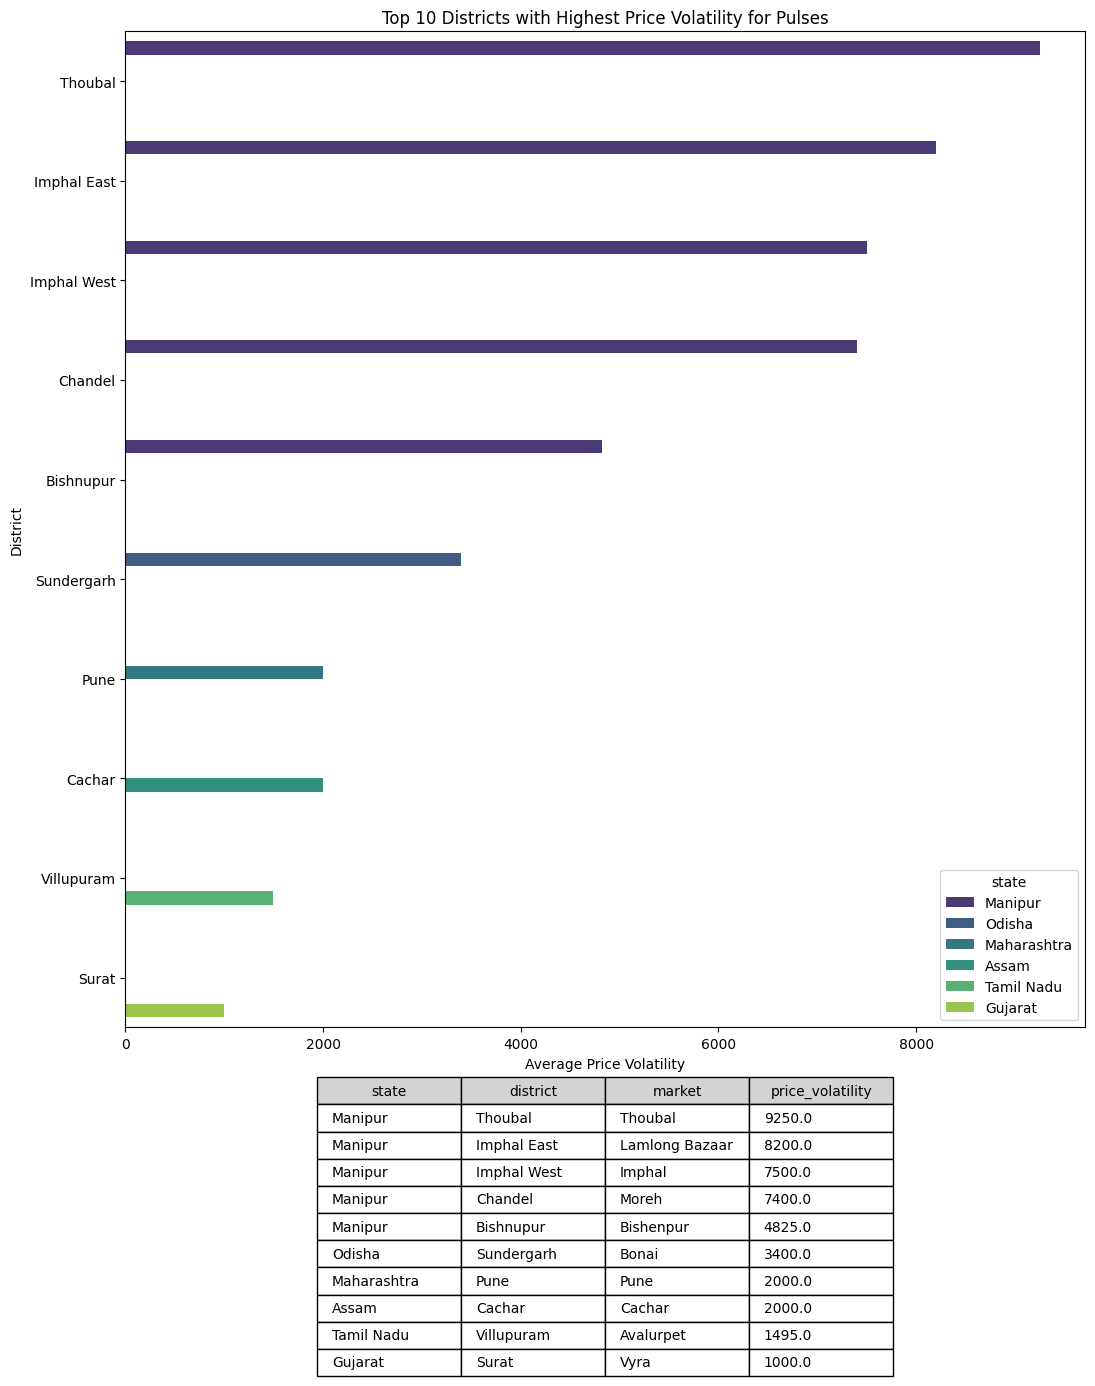

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a horizontal bar plot for the top 10 districts with the highest volatility for Pulses
plt.figure(figsize=(16, 12))  # Increase figure size

# Plot
sns.barplot(x='price_volatility', y='district', hue='state', data=top_10_volatility, palette='viridis')

# Title and labels
plt.title('Top 10 Districts with Highest Price Volatility for Pulses')
plt.xlabel('Average Price Volatility')
plt.ylabel('District')

# Adjust margins to fit the table below
plt.subplots_adjust(left=0.2, right=0.8, bottom=0.05)

# Add a table below the plot
table_data = top_10_volatility[['state', 'district', 'market', 'price_volatility']]
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='left', colColours=['lightgrey']*4, bbox=[0.2, -0.35, 0.6, 0.3])
table.auto_set_font_size


PRICE RANGE ANALYSIS

The price range is calculated as the difference between max price and modal price. This reveals the extent of price variation from the most common price, providing insights into market behavior.

-> A wide price range indicates large discrepancies between common prices and extreme values, which could suggest price manipulation or rapid market changes.
-> Narrow ranges suggest a more uniform pricing structure, which might indicate a well-regulated market.

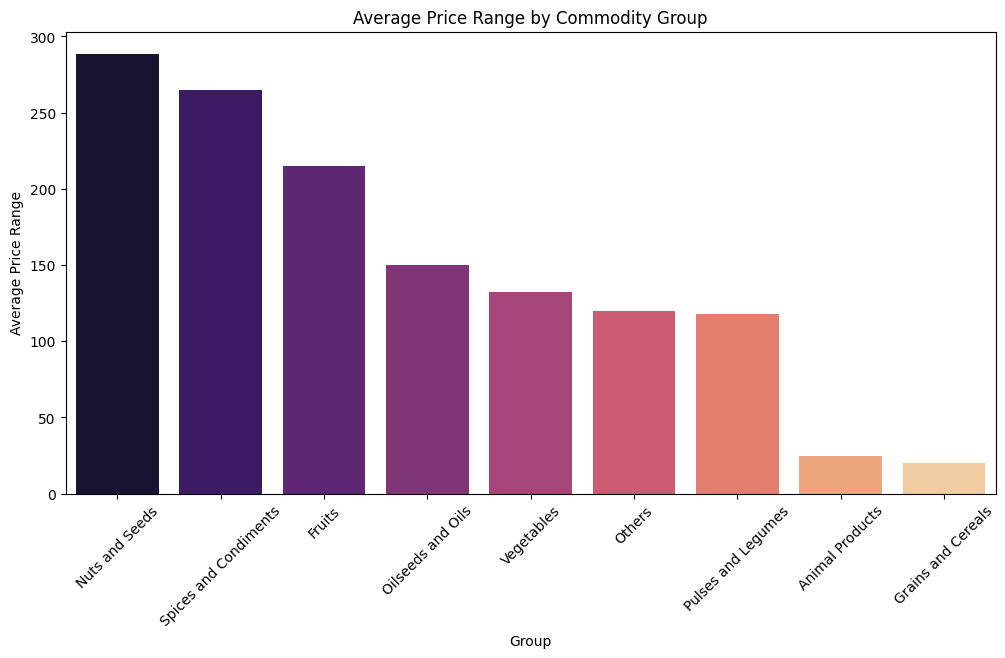

In [119]:
df['price_range'] = df['max_price'] - df['modal_price']
price_range_by_group = df.groupby('Group')['price_range'].mean().reset_index()

price_range_by_group = price_range_by_group.sort_values(by='price_range', ascending=False)

price_range_by_group

plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='price_range', data=price_range_by_group, palette='magma')
plt.title('Average Price Range by Commodity Group')
plt.xlabel('Group')
plt.ylabel('Average Price Range')
plt.xticks(rotation=45)
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14764\3958896215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuts_data['price_range'] = nuts_data['max_price'] - nuts_data['modal_price']


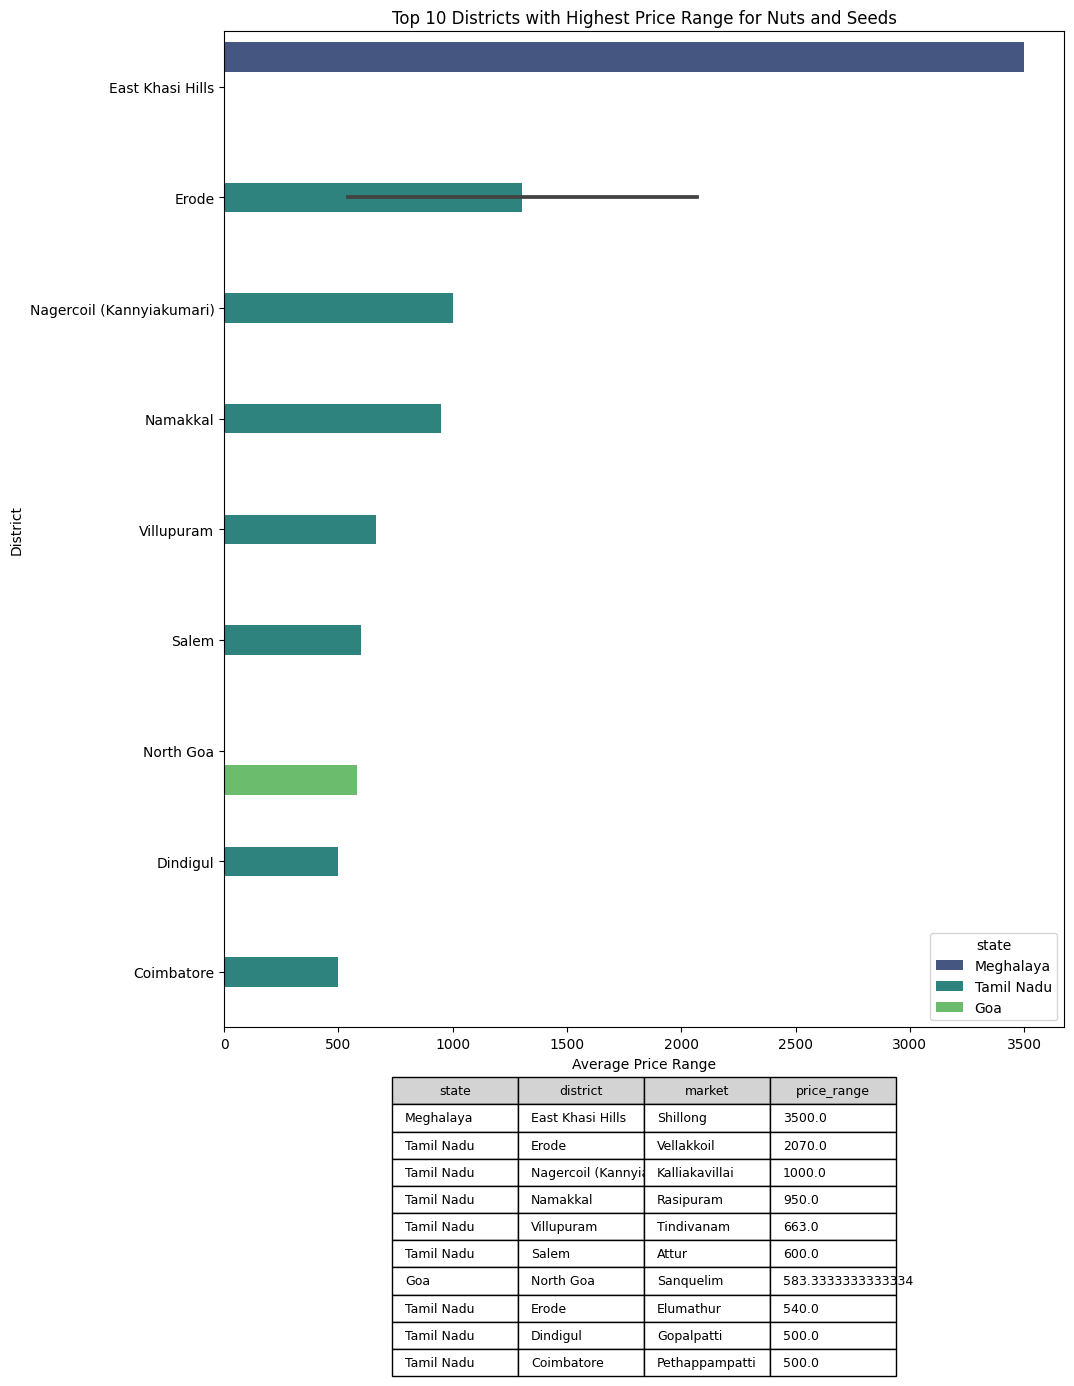

In [120]:
nuts_data = df[df['Group'] == 'Nuts and Seeds']

nuts_data['price_range'] = nuts_data['max_price'] - nuts_data['modal_price']

nuts_district_range = nuts_data.groupby(['state', 'district', 'market']).agg({
    'price_range': 'mean'
}).reset_index()

top_10_nuts_range = nuts_district_range.sort_values(by='price_range', ascending=False).head(10)

plt.figure(figsize=(14, 12))  # Increase figure size

sns.barplot(x='price_range', y='district', hue='state', data=top_10_nuts_range, palette='viridis')

plt.title('Top 10 Districts with Highest Price Range for Nuts and Seeds')
plt.xlabel('Average Price Range')
plt.ylabel('District')

plt.subplots_adjust(left=0.2, right=0.8, bottom=0.05)

table_data = top_10_nuts_range[['state', 'district', 'market', 'price_range']]
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, loc='bottom', cellLoc='left', colColours=['lightgrey']*4, bbox=[0.2, -0.35, 0.6, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(9)

plt.show()


Group-Specific Analysis:

Top districts were identified with the highest price range within each commodity group. This information pinpoints regions where prices vary the most, highlighting areas of market instability or opportunity.

-> High price ranges in specific districts indicate areas where prices are highly negotiable or volatile.
-> Identifying these districts allows for targeted interventions to stabilize prices or optimize supply chains.
-> These insights are valuable for agribusinesses looking to expand in high-opportunity markets or avoid volatile areas.


In [121]:

df['price_range'] = df['max_price'] - df['min_price']
district_price_range = df.groupby(['commodity', 'district']).agg({'price_range': 'mean'}).reset_index()
top_districts = district_price_range.sort_values(by='price_range', ascending=False).groupby('commodity').head(1)
top_districts.head()


,commodity,district,price_range
236,Black pepper,South Andaman,20000.0
146,Bengal Gram Dal (Chana Dal),Thoubal,11000.0
31,Apple,Pune,10000.0
164,Betal Leaves,East Khasi Hills,9000.0
946,Masur Dal,Imphal East,8200.0


> High Price Variability: 
Black Pepper in South Andaman has the highest price range, suggesting significant variability in pricing, which could be due to factors like supply inconsistencies, market demand fluctuations, or logistic challenges unique to the region.

> Opportunity for Market Intervention: 
The high price ranges in districts like Thoubal for Bengal Gram Dal and Pune for Apples indicate areas where price stabilization measures might be beneficial. Policymakers can focus on these regions to introduce measures that reduce price fluctuations.

> Market Targeting for Agribusinesses: 
Districts with high price ranges may offer negotiation opportunities or indicate regions with high consumer demand willing to pay variable prices. Agribusinesses can leverage this information to strategize market entry or adjust supply chains to maximize profits.

> Farmers' Insights:
 For farmers, understanding which districts have high price ranges can help optimize their market strategies, allowing them to target higher-priced markets when supply conditions are favorable.

CONCLUSION

The comprehensive analysis of agricultural market data, focusing on modal prices, price volatility, and regional disparities among top commodities and districts by utilizing feature engineering techniques,  critical market dynamics that can guide decision-making for farmers, agribusinesses, and policymakers were identified.

Major Insights Included:

-> Top Commodities by Modal Price: The analysis of the top commodities highlighted key market leaders with consistently high prices, like Black Pepper and Bengal Gram Dal, revealing areas where high demand and potential profitability exist. Agribusinesses can use this data to target high-value commodities for market entry.
  
-> Price Volatility in Key Districts: Identifying districts such as South Andaman for Black Pepper and Pune for Apples, with significant price ranges, points to areas with high price negotiation flexibility or volatility. This insight is crucial for agribusinesses and farmers to optimize market timing, procurement strategies, and pricing models.
  
-> Regional Price Disparities: The scatter plot analysis of max vs. min prices across states uncovered market behaviors, showcasing how local factors affect pricing dynamics. For instance, high volatility regions can signal opportunities for new market strategies or indicate areas that might require policy support to stabilize prices.

-> Targeted Interventions and Market Opportunities: By identifying specific districts with high price fluctuations, stakeholders can better allocate resources and focus on targeted interventions such as market regulation, supply chain adjustments, or infrastructural support. For agribusinesses, these regions present opportunities for expansion, provided they account for the volatility and plan accordingly.

This underscores the importance of data-driven decision-making in agriculture. By examining commodity-specific and region-specific price patterns, the findings provide actionable insights for enhancing market efficiency, improving farmer income stability, and guiding strategic interventions. These insights contribute to a more informed and balanced agricultural sector, where decisions are backed by data rather than assumptions.